In [1]:
import pandas
import datetime
import numpy
import scipy.optimize
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
%matplotlib inline
from matplotlib import rcParams

In [2]:
# some constants and cutoffs
mincutOffLosVel = 50.
maxcutOffLosVel = 2000.
mincutOffspWdth = 100.
maxcutOffspWdth = 500.
minCutOffPwr = 3.
gridSizenormMLT = 0.5
gridSizeMLAT = 0.25
minNumPntsCutoffCell = 5 # Somewhat arbitrary determination!!

In [3]:
inpCols = [ "beam", "range", "geoAzm", "magAzm", "vLos"\
           , "MLAT", "MLT", "MLON", "GLAT", "GLON", "radId"\
           , "radCode","normMLT", "normMLTRound", "spwdth", "pwr" ]
velsDataDF = pandas.read_csv("../data/apr9-840-losVels.txt")
velsDataDF.columns = inpCols
velsDataDF = velsDataDF[ (abs(velsDataDF["vLos"]) >= mincutOffLosVel) &\
                       (velsDataDF["spwdth"] >= mincutOffspWdth)&\
                       (velsDataDF["pwr"] >= minCutOffPwr)&\
                       (abs(velsDataDF["vLos"]) <= maxcutOffLosVel)&\
                       (velsDataDF["spwdth"] <= maxcutOffspWdth)].reset_index(drop=True)
velsDataDF.head()

,beam,range,geoAzm,magAzm,vLos,MLAT,MLT,MLON,GLAT,GLON,radId,radCode,normMLT,normMLTRound,spwdth,pwr
0,5,27,-41.65,-38.83,-378.1679,56.7707,2.5717,-18.7139,45.3710,-89.3080,33,bks,2.5717,2,108.6326,12.8346
1,5,28,-41.65,-39.16,-396.3842,57.0027,2.5290,-19.3536,45.6378,-89.7470,33,bks,2.5290,2,108.6326,9.4804
2,5,29,-41.65,-39.50,-379.2044,57.2309,2.4859,-20.0005,45.9024,-90.1899,33,bks,2.4859,2,108.6326,8.7086
3,5,30,-41.65,-39.85,-368.0763,57.4553,2.4423,-20.6546,46.1649,-90.6368,33,bks,2.4423,2,101.2517,7.1071
4,6,25,-37.79,-33.55,-221.1927,56.8363,2.7261,-16.3974,45.3789,-87.7046,33,bks,2.7261,2,102.3670,14.6025


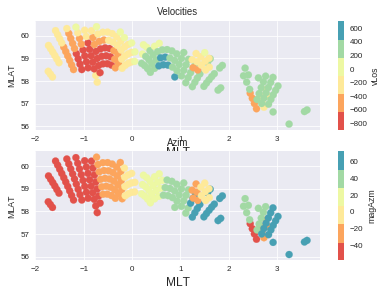

In [4]:
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Spectral"))
# Plot using matplotlib
fig1 = plt.figure()
ax1 = fig1.add_subplot(211)
velsDataDF.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='vLos',
              s=50., cmap=seaMap, ax=ax1)
ax1.set_ylabel("MLAT")
ax1.set_xlabel("MLT", fontsize=12)
ax1.set_title( "Velocities" )
ax2 = fig1.add_subplot(212)
velsDataDF.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='magAzm',
              s=50., cmap=seaMap, ax=ax2)
ax2.set_ylabel("MLAT")
ax2.set_xlabel("MLT", fontsize=12)
ax2.set_title( "Azim" )
# ax.set_ylim( [55., 62.] )
fig1.savefig("../figs/lShellVelsAzims.pdf",bbox_inches='tight')
# ax.get_figure().savefig("../figs/sapsVels.pdf",bbox_inches='tight')
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####

In [5]:
# We'll work on a creating a grid.
minLat = round( velsDataDF["MLAT"].min() )
maxLat = round( velsDataDF["MLAT"].max() )
minnormMLT = round( velsDataDF["normMLT"].min() )
maxnormMLT = round( velsDataDF["normMLT"].max() )
print minLat, maxLat, minnormMLT, maxnormMLT
print "56.0959 60.3891"

56.0 60.0 -2.0 4.0
56.0959 60.3891


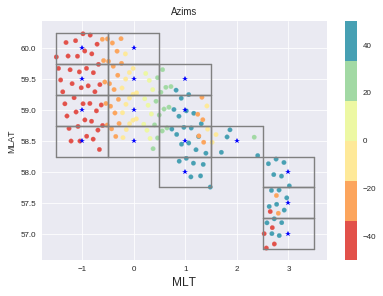

In [27]:
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Spectral"))
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
# velsDataDF.plot( kind='scatter',
#               x='normMLT',
#               y='MLAT',
#               c='magAzm',
#               s=20., cmap=seaMap, ax=ax)
ax.set_ylabel("MLAT")
ax.set_xlabel("MLT", fontsize=12)
ax.set_title( "Azims" )

for la in numpy.arange( minLat, maxLat+1, gridSizeMLAT*2 ):
    for ml in numpy.arange( minnormMLT, maxnormMLT+1, gridSizenormMLT*2 ):
        dfSel = velsDataDF[ (velsDataDF["MLAT"] >= la - gridSizeMLAT) &\
                              (velsDataDF["MLAT"] < la + gridSizeMLAT) &\
                            (velsDataDF["normMLT"] >= ml - gridSizenormMLT) &\
                              (velsDataDF["normMLT"] < ml + gridSizenormMLT)]
        if dfSel.shape[0] > minNumPntsCutoffCell:
            im = ax.scatter( dfSel["normMLT"], dfSel["MLAT"], s=20.,\
                           c=dfSel["magAzm"], marker = 'o', cmap = seaMap, vmin=-50, vmax=50 )
            ax.plot( ml, la, 'b*' )
            ax.plot( [ ml - gridSizenormMLT, ml - gridSizenormMLT ], \
                [ la - gridSizeMLAT, la + gridSizeMLAT ], '0.5' )
            ax.plot( [ ml - gridSizenormMLT, ml+gridSizenormMLT ], \
                    [ la - gridSizeMLAT, la - gridSizeMLAT ], '0.5' )

            ax.plot( [ ml - gridSizenormMLT, ml+gridSizenormMLT ], \
                    [ la + gridSizeMLAT, la + gridSizeMLAT ], '0.5' )
            ax.plot( [ ml+gridSizenormMLT, ml+gridSizenormMLT ], \
                    [ la - gridSizeMLAT, la + gridSizeMLAT ], '0.5' )
fig1.colorbar(im)
fig1.savefig("../figs/lShellAzmisgridded.pdf",bbox_inches='tight')

In [34]:
# Some fitting functions
# Fit a sine curve for a given cell
def vel_sine_func(theta, Vmax, delTheta):
    # we are working in degrees but numpy deals with radians
    # convert to radians
    return Vmax * numpy.sin( numpy.deg2rad(theta) +\
                            numpy.deg2rad(delTheta) )

def model_func(theta, Vmax, delTheta):
    vLos = Vmax * numpy.sin( numpy.deg2rad(theta) +\
                            numpy.deg2rad(delTheta) )
    return vLos

initGuess = ( 1000., 10. )

    beam  range  geoAzm  magAzm      vLos     MLAT     MLT     MLON     GLAT  \
0      5     27  -41.65  -38.83 -378.1679  56.7707  2.5717 -18.7139  45.3710   
1      5     28  -41.65  -39.16 -396.3842  57.0027  2.5290 -19.3536  45.6378   
4      6     25  -37.79  -33.55 -221.1927  56.8363  2.7261 -16.3974  45.3789   
5      6     26  -37.79  -33.84 -262.1818  57.1001  2.6866 -16.9892  45.6715   
15    10     23   43.38   46.41  304.8513  57.1783  2.5832 -18.5406  45.7964   
20    11     24   46.62   50.48  318.3355  57.0036  2.6790 -17.1036  45.5720   
21    11     25   46.62   50.96  321.9906  57.2431  2.7248 -16.4174  45.8106   
26    12     26   49.86   54.99  370.8088  56.9721  2.8212 -14.9709  45.4988   
27    12     27   49.86   55.48  374.2135  57.1807  2.8693 -14.2489  45.7122   

       GLON  radId radCode  normMLT  normMLTRound    spwdth      pwr  
0  -89.3080     33     bks   2.5717             2  108.6326  12.8346  
1  -89.7470     33     bks   2.5290             2  108.63

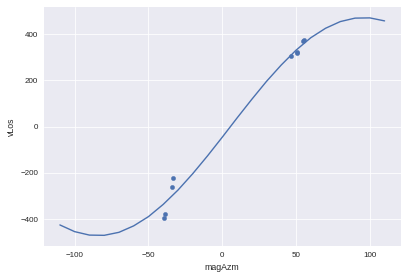

In [55]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
for la in numpy.arange( minLat, maxLat+1, gridSizeMLAT*2 ):
    for ml in numpy.arange( minnormMLT, maxnormMLT+1, gridSizenormMLT*2 ):
        dfSel = velsDataDF[ (velsDataDF["MLAT"] >= la - gridSizeMLAT) &\
                              (velsDataDF["MLAT"] < la + gridSizeMLAT) &\
                            (velsDataDF["normMLT"] >= ml - gridSizenormMLT) &\
                              (velsDataDF["normMLT"] < ml + gridSizenormMLT)]
        if ( (ml == 3) and (la == 57.) ) :
            if dfSel.shape[0] >= 5:
                print dfSel
                popt, pcov = scipy.optimize.curve_fit(vel_sine_func, \
                        dfSel['magAzm'].T,\
                        dfSel['vLos'].T,
                       p0=initGuess)
                print "Vmax--->", popt[0],"+/-", pcov[0,0]**0.5
                print "delTheta--->", popt[1],"+/-", pcov[1,1]**0.5
                thetaArr = range(-110, 120, 10)
                vLosArr = [ round( model_func(t, popt[0],popt[1]) ) for t in thetaArr ]
                ax.plot( thetaArr, vLosArr )
                dfSel.plot( x="magAzm", y="vLos", kind="scatter", ax=ax )

58.5 -1.0 58.25 58.75 -2.25 0.25
Vmax---> 607.141429167 +/- 65.8063817069
delTheta---> -35.2295037945 +/- 17.0675816478


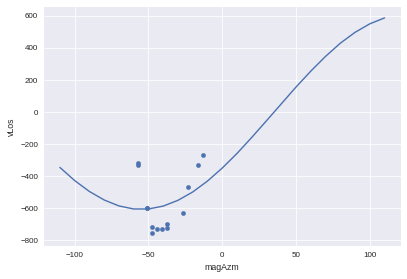

In [69]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
mlatCellSizeArr = [ 0.25 ]
mltCellSizeArr = [ 1.25 ]
for la in numpy.arange( minLat, maxLat+1, 0.5 ):
    for ml in numpy.arange( minnormMLT, maxnormMLT+1, 1. ):
        if (la != 58.5) or (ml != -1):
            continue
        for csLat in mlatCellSizeArr:
            for csMlt in mltCellSizeArr:
                print la, ml, la - csLat, la + csLat, ml - csMlt, ml + csMlt
                dfSel = velsDataDF[ (velsDataDF["MLAT"] >= la - csLat) &\
                                      (velsDataDF["MLAT"] < la + csLat) &\
                                    (velsDataDF["normMLT"] >= ml - csMlt) &\
                                      (velsDataDF["normMLT"] < ml + csMlt)]
                
                popt, pcov = scipy.optimize.curve_fit(vel_sine_func, \
                        dfSel['magAzm'].T,\
                        dfSel['vLos'].T,
                       p0=initGuess)
                print "Vmax--->", popt[0],"+/-", pcov[0,0]**0.5
                print "delTheta--->", popt[1],"+/-", pcov[1,1]**0.5
                thetaArr = range(-110, 120, 10)
                vLosArr = [ round( model_func(t, popt[0],popt[1]) ) for t in thetaArr ]
                ax.plot( thetaArr, vLosArr )
                dfSel.plot( x="magAzm", y="vLos", kind="scatter", ax=ax )
fig1.savefig("../figs/test.pdf",bbox_inches='tight')